In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.layers.wrappers import TimeDistributed
import keras.callbacks
from keras import optimizers
import argparse
import pickle
from RNN_utils import *


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

DEFAULT_LAYERS = 2
DEFAULT_HIDDEN = 500
DEFAULT_DROPOUT = 0.0

layers = [1, 3]
hidden = [300, 700]
dropout = [0.15, 0.3]
DATA_DIR = './data/shakespeare_input.txt'
BATCH_SIZE = 30
SEQ_LENGTH = 50

num_epochs = 50

# Creating training data
X, y, VOCAB_SIZE, ix_to_char, char_to_ix = load_data(DATA_DIR, SEQ_LENGTH)

fnames = ['weights_layers_1_hidden_500_dropout_0_epoch_9.hdf5', 'weights_layers_2_hidden_300_dropout_0_epoch_10.hdf5', 
          'weights_layers_2_hidden_500_dropout_0_epoch_6.hdf5', 'weights_layers_2_hidden_500_dropout_15_epoch_10.hdf5',
          'weights_layers_2_hidden_500_dropout_3_epoch_13.hdf5', 'weights_layers_2_hidden_700_dropout_0_epoch_7.hdf5', 
          'weights_layers_3_hidden_500_dropout_0_epoch_7.hdf5']


Data length: 4573338 characters
Vocabulary size: 67 characters


In [3]:
# Split testing data from training/validation data
train_split = 0.8
test_ind = int(round(train_split*len(X)))
X_test = X[test_ind:]
y_test = y[test_ind:]
X_train = X[:test_ind]
y_train = y[:test_ind]

In [4]:
models = []
for f in fnames:
    layers, hidden, dropout, epoch = [int(s) for s in f.replace('.','_').split('_') if s.isdigit()]
    model = make_lstm_model(VOCAB_SIZE, layers, hidden, dropout)
    model.load_weights(f)
    models.append(model)

In [ ]:
# test_losses1 = []
# # test_losses2 = []
# for m in models:
#     test_losses1.append(m.evaluate(X_test, y_test, batch_size=30, verbose=1))
# #     test_losses2.append(evaluate_loss(m, X_test))

In [ ]:
# print(test_losses1)
# # print(test_losses2)

In [5]:
evaluate_loss(models[-1], X_test, y_test)

1.5112226

In [ ]:
test_losses1[3]

In [ ]:
fnames[3]

In [6]:
his_fnames = []
for f in fnames:
    his_fnames.append(f.replace('weights', 'history').replace('.hdf5', ''))

In [7]:
histories =  []
for f in his_fnames:
    with open(f, 'r') as file_pi:
        histories.append(pickle.load(file_pi))

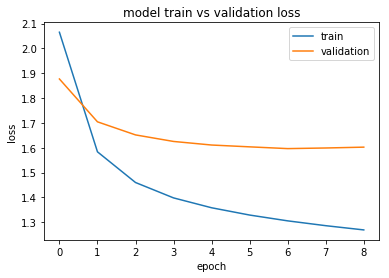

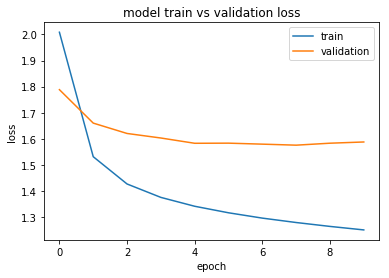

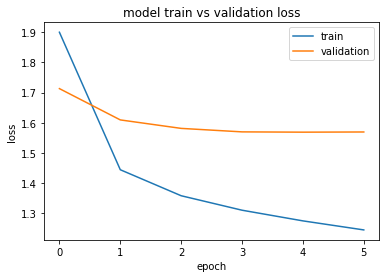

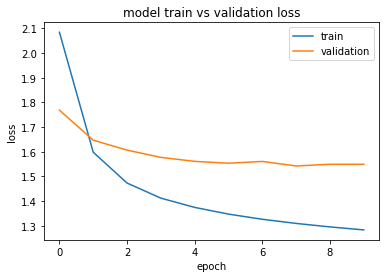

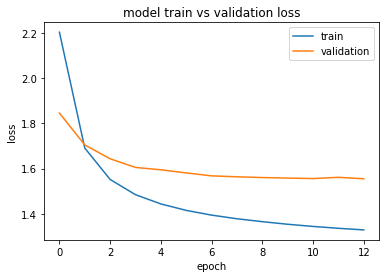

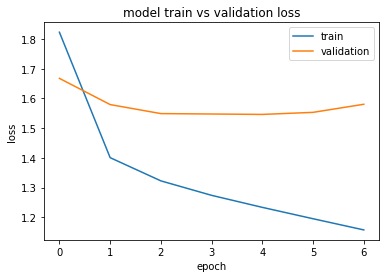

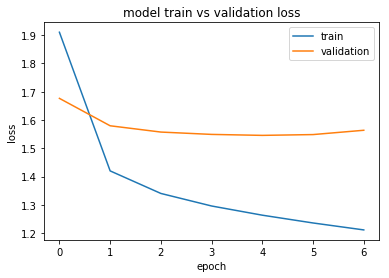

In [16]:
for h in histories:
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [ ]:
for h in histories:
    print(h['loss'][-1],h['val_loss'][-1])

In [10]:
predictions = []
for m in models:
    predictions.append(generate_text(m, 100, VOCAB_SIZE,  ix_to_char, [char_to_ix['H']], 0))

He that hath been a stranger than the state
To the poor man's advantage of the parties of the part
THere is a man of my consent,
And the duke of the sea and the state of her state,
And the duke of theHere is a strange that she shall be so fairly.

BRUTUS:
I do not see the marketh of the state,
And tHere is the storm of the state of the state
That should have stol'n his state and strange state
And Here is a prince and the state of the state
And there were so much to the common prince and the statHere comes the last that should be so with me?

BEATRICE:
I will not speak with me; I will not speakHe is a dream of many a man as the sea,
That thou art the sea of the sea, and the sea of the sea,
An

In [11]:
predictions

["He that hath been a stranger than the state\nTo the poor man's advantage of the parties of the part\nTh",
 'Here is a man of my consent,\nAnd the duke of the sea and the state of her state,\nAnd the duke of the ',
 'Here is a strange that she shall be so fairly.\n\nBRUTUS:\nI do not see the marketh of the state,\nAnd th',
 "Here is the storm of the state of the state\nThat should have stol'n his state and strange state\nAnd s",
 'Here is a prince and the state of the state\nAnd there were so much to the common prince and the state',
 'Here comes the last that should be so with me?\n\nBEATRICE:\nI will not speak with me; I will not speak ',
 'He is a dream of many a man as the sea,\nThat thou art the sea of the sea, and the sea of the sea,\nAnd']

In [14]:
predictions_rand = []
for m in models:
    predictions_rand.append(generate_text(m, 100, VOCAB_SIZE,  ix_to_char, [char_to_ix['H']], 1))

Henobed my daughter gaze
That you have cased to the advantage of my friend.

HESTYRY:
'Twould have dHe says my lord, adieu,
Methinks this word within these hours,
That on the print is threatening everHENRY VIII:
I have no more mad-certaintral grace
Where he was liin from him, and take't with shelt oH:
How say you, will you you break the open to a slave?
'Tis true: which shall be hedged of men!
ShaHERSITES:
He was whom I think they would lie.

BRUTUS:
Adventurally, aleward, from title honour
ThatHath made me banished?

OCTAVIUS:
An thou shalt lie, which we were slow,
There's near in thy pursuitHARNERICK:
What wouldst thou? why set thou?

Post:
It is true, what's the proud man? further! passio

In [15]:
predictions_rand

["Henobed my daughter gaze\nThat you have cased to the advantage of my friend.\n\nHESTYRY:\n'Twould have di",
 'He says my lord, adieu,\nMethinks this word within these hours,\nThat on the print is threatening ever,',
 "HENRY VIII:\nI have no more mad-certaintral grace\nWhere he was liin from him, and take't with shelt ou",
 "H:\nHow say you, will you you break the open to a slave?\n'Tis true: which shall be hedged of men!\nShal",
 'HERSITES:\nHe was whom I think they would lie.\n\nBRUTUS:\nAdventurally, aleward, from title honour\nThat ',
 "Hath made me banished?\n\nOCTAVIUS:\nAn thou shalt lie, which we were slow,\nThere's near in thy pursuit.",
 "HARNERICK:\nWhat wouldst thou? why set thou?\n\nPost:\nIt is true, what's the proud man? further! passion"]